# Data exploration: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [69]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Write your code here to read the data
df=pd.read_csv("/content/foodhub_order.csv")

In [72]:
# Write your code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [73]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in the foodhub dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datatypes of the columns,order_id,customer_id,food_preparation_time,delivery_time are int64, restaurant_name,cuisine_type,day_of_the_week,rating are object and cost_of_the_order is float64

In [75]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values in the data

In [76]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

The minimum, average, and maximum time in minutes, it takes for food to be prepared once an order is placed are as follows,

| Minimum (min) | Average (min) | Maximum (min)|
|:--------|:-----------------:|:---------------:|
| 20   | 27.37 | 35 |

In [77]:
# Write the code here
len(df[df['rating']=='Not given'].value_counts())

736

#### Observations:
736 are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

## Rating

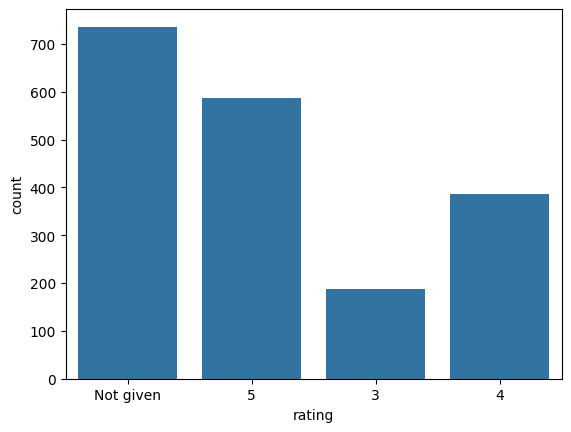

In [78]:
# Write the code here
sns.countplot(df,x='rating')
plt.show()

#### Observations:
There are more orders with no ratings compared to the rated. Of the rated orders, orders with 5 rating are highest, 4 rating orders are higher than 3 rating orders

## Cuisine type

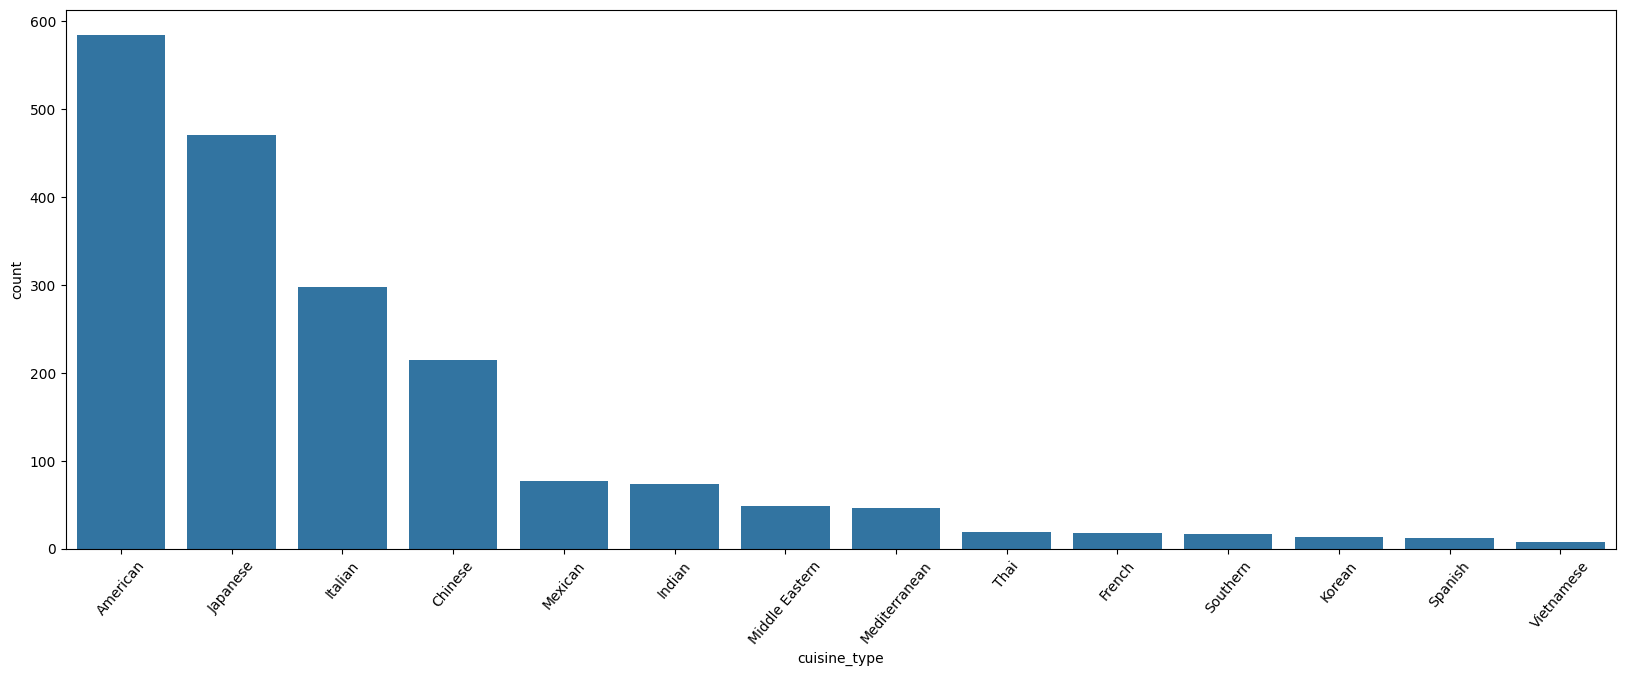

In [79]:
plt.figure(figsize=(20,7))
sns.countplot(df,x='cuisine_type',order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation=50)
plt.show()

#### Observations:
Among the cuisines, in the number of orders, American is the topmost followed by Japanese, Italian. The struggling five are French, Southern, Korean, Spanish, Vietnamese.

#### Restaurant counts in topmost cuisine vs least 5 cuisines

In [80]:
def get_restau(cuisine):
    return len(df[(df['cuisine_type'] == cuisine)][['restaurant_name','cuisine_type']].groupby('cuisine_type').value_counts())


In [81]:
get_restau('French'),get_restau('Korean'),get_restau('Southern'),get_restau('Spanish'),get_restau('Vietnamese')

(3, 5, 2, 3, 3)

#### Observations:
The restaurant counts in struggling cuisines are:

| Cuisine | Restaurant count |
|:--------|:----------------:|
| French   |        3         |
| Korean   |        5         |
| Southern   |        2         |
| Spanish   |        3         |
| Vietnamese   |        3         |

In [82]:
get_restau('American')

41

#### Observations:
Comparing struggling cuisines with American, that has 41 restaurants

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


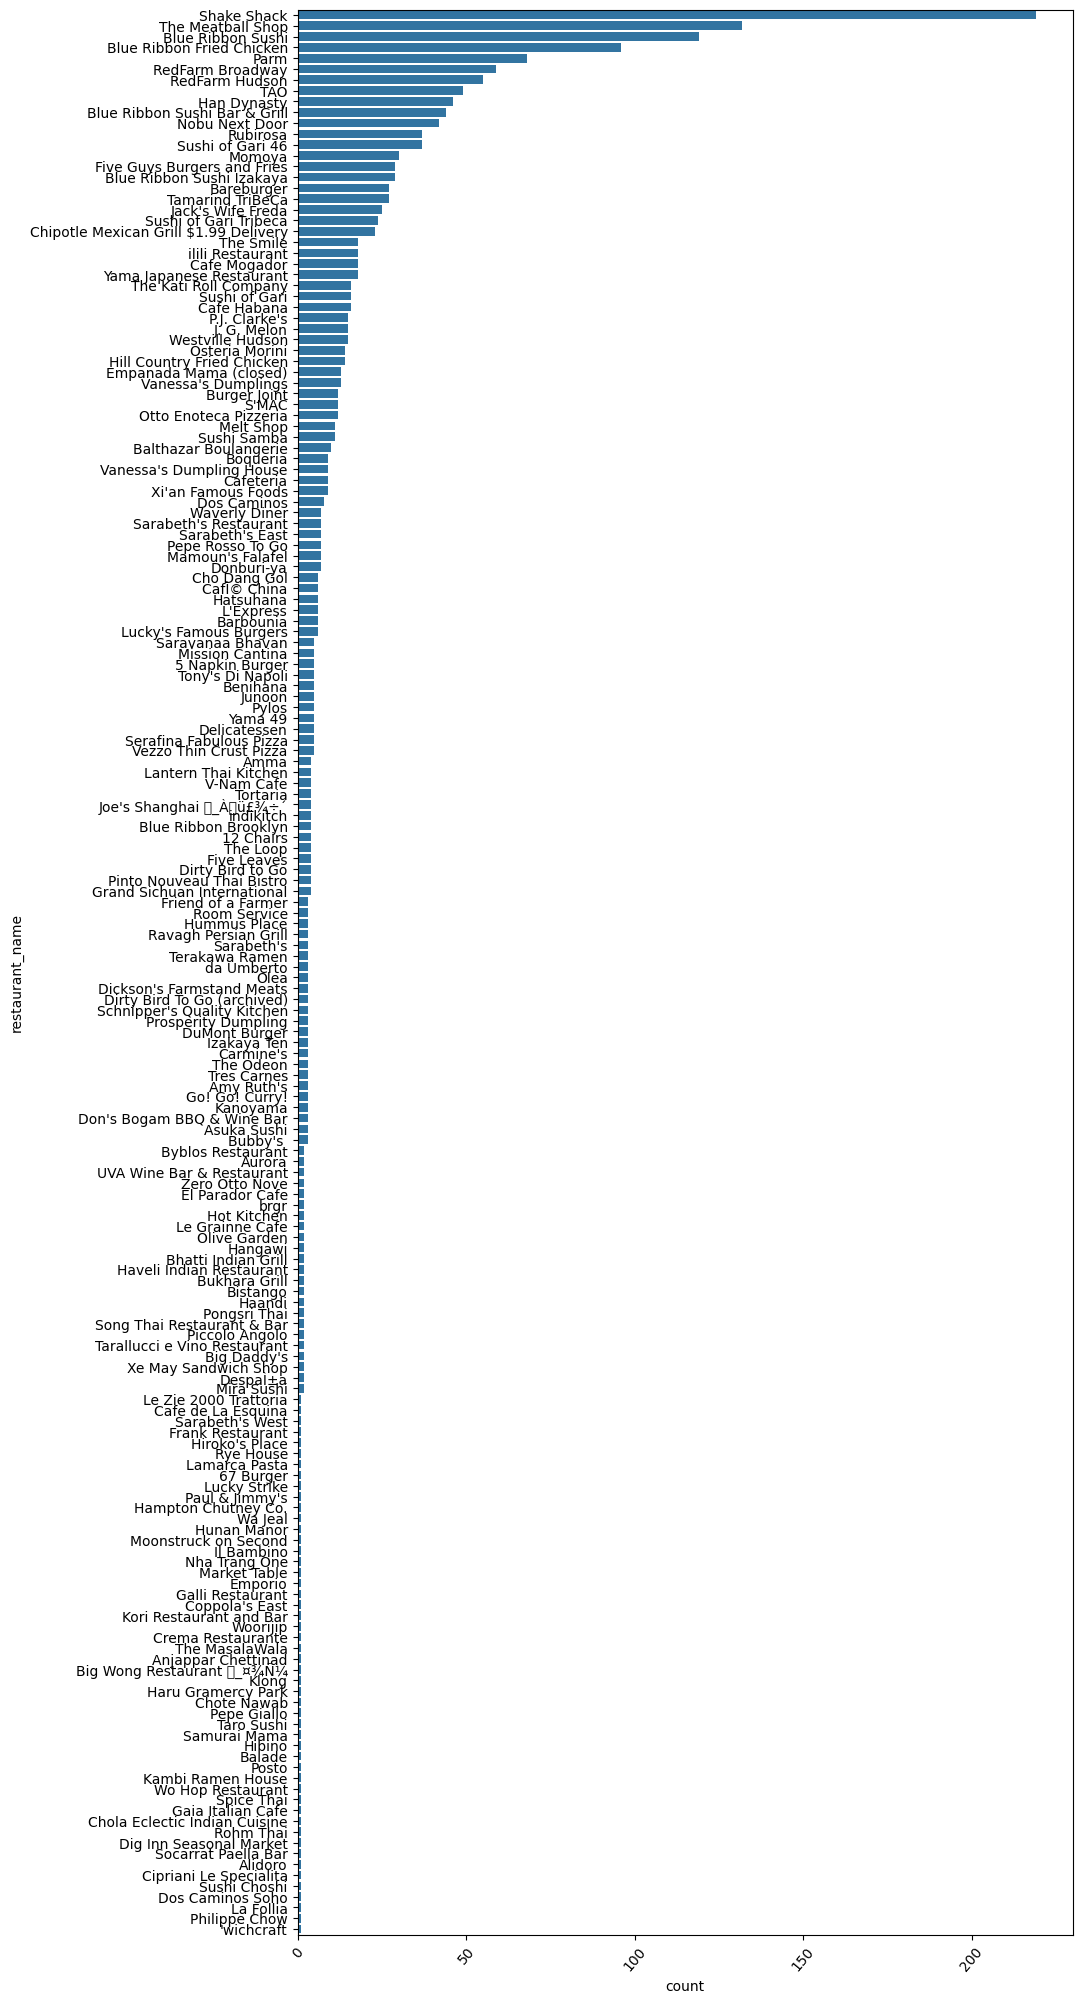

In [83]:
plt.figure(figsize=(10,25))
sns.countplot(df,y='restaurant_name',order = df['restaurant_name'].value_counts().index)
plt.xticks(rotation=50)
plt.show()

#### Observations:
The top 3 most popular restaurants are Shake Shack,The Meatball Shop,Blue Ribbon Sushi.

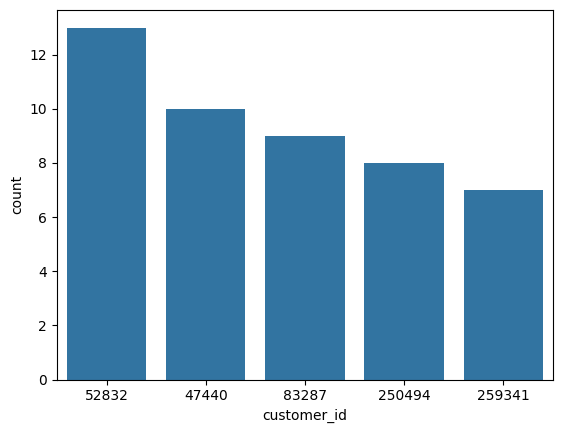

In [84]:
top_cust = df['customer_id'].value_counts().nlargest(5).index

df_top_cust = df[df['customer_id'].isin(top_cust)]
sns.countplot(data=df_top_cust, x='customer_id', order=top_cust)
plt.show()

#### Observations:
The topmost customers are with IDs 52832,47440,83287,250494,259341

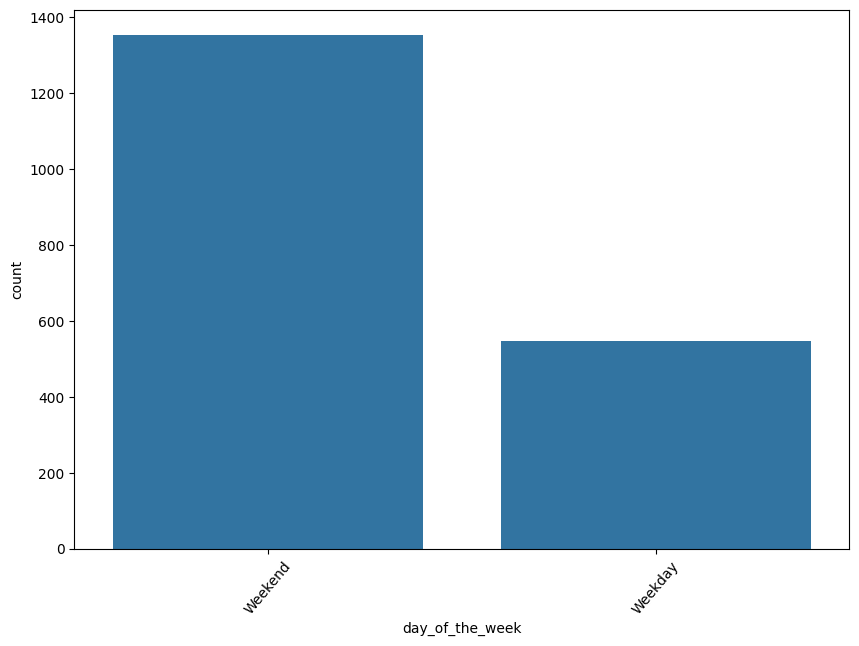

In [85]:
plt.figure(figsize=(10,7))
sns.countplot(df,x='day_of_the_week')
plt.xticks(rotation=50)
plt.show()

#### Observations:
There are more orders on Weekend than Weekday, Weekday orders is around 40% of Weekend.

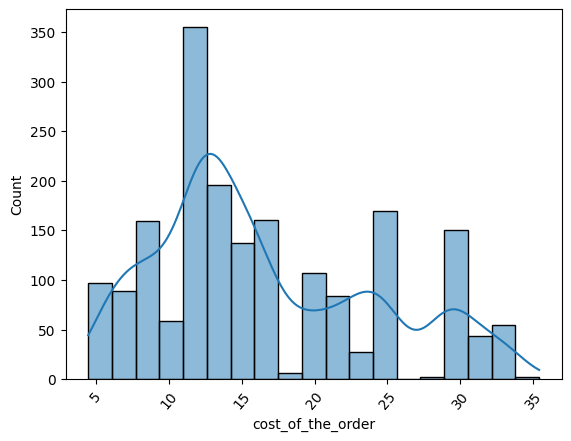

In [86]:
sns.histplot(df,x='cost_of_the_order',kde=True)
plt.xticks(rotation=50)
plt.show()

#### Observations:
The cost of the order is multimodal, with peaks around 12 dollars, 24 dollars and 30 dollars.
The distribution is positively skewed.

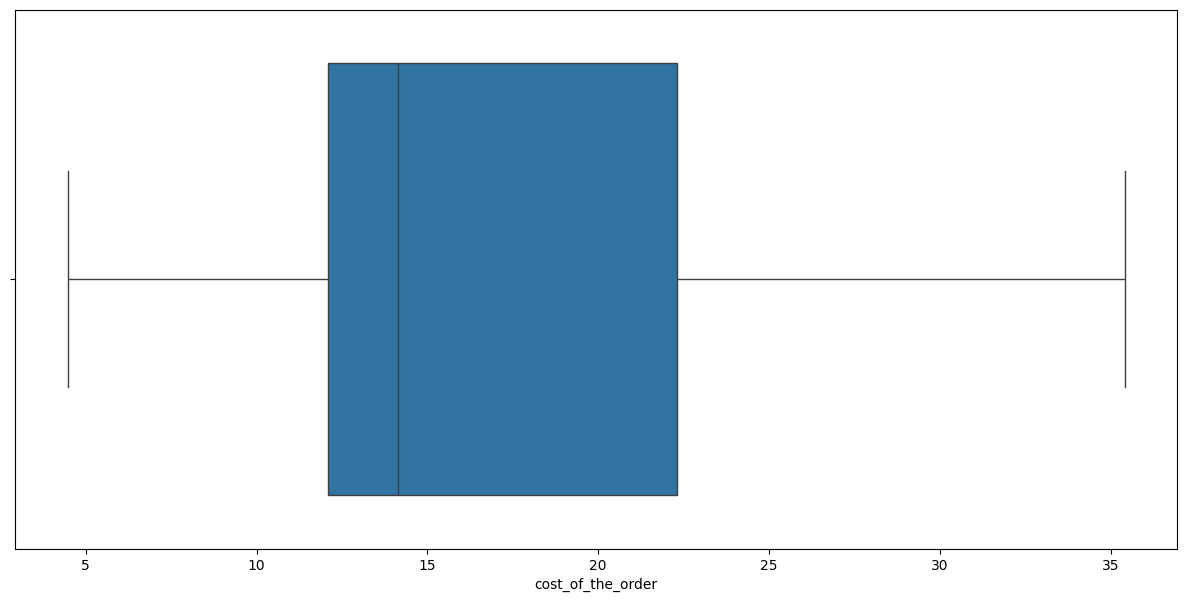

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(df,x='cost_of_the_order')
plt.show()

#### Observations:
Median of the cost of the order is around 14 dollars, Q1 is around 12 dollars and Q3 is around 22 dollars

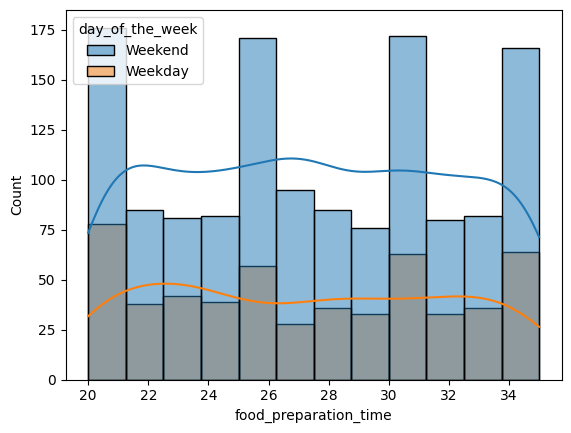

In [88]:
sns.histplot(df,x='food_preparation_time',hue='day_of_the_week',kde=True)
plt.show()

#### Observations:
The food preparation time has bimodal distribution from the KDE plot with peaks centered around 21-22min and 26-27min. There are more orders with these food preparation times. The spread is around 15 mins.

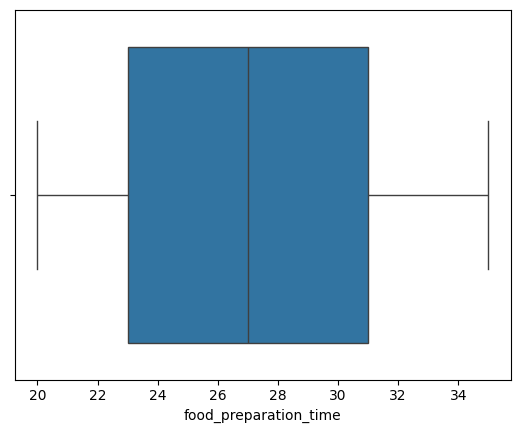

In [89]:
sns.boxplot(df,x='food_preparation_time')
plt.show()

#### Observations:
The food preparation time median is around 27 min, Q1 is around 23 min and Q3 is around 31 min. IQR is around 18 min. There are no outliers.

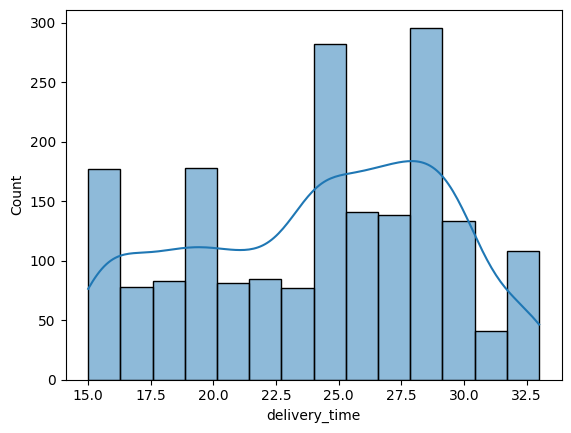

In [90]:
sns.histplot(df,x='delivery_time',kde=True)
plt.show()

#### Observations:
The delivery time has bimodal distribution from the KDE plot with peaks centered around 24-25min and 27-28min

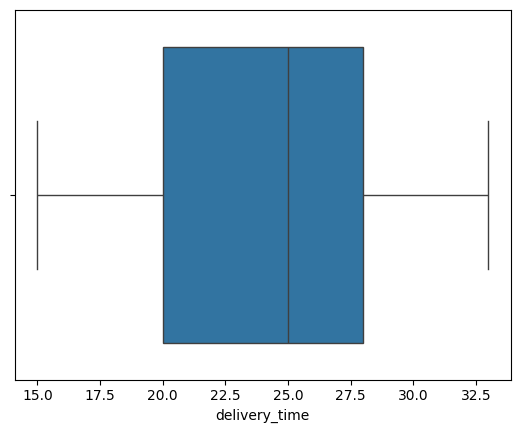

In [91]:
sns.boxplot(df,x='delivery_time')
plt.show()

#### Observations:
The delivery time median is around 25 min, Q1 is around 20 min and Q3 is around 28 min.

In [92]:
df.groupby(['restaurant_name'])['order_id'].count().nlargest(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants in terms of the number of orders received are Shake Shack,
The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

In [93]:
top_cuisines=df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts()
top_cuisines.iloc[:1]

,count
cuisine_type,
American,415


#### Observations:
The most popular cuisine on weekends is American

### Multivariate Analysis

## Total time

In [97]:
df['total_time']=df['delivery_time']+df['food_preparation_time']

## Correlation between Food preparation time, Delivery_time, Cost of order

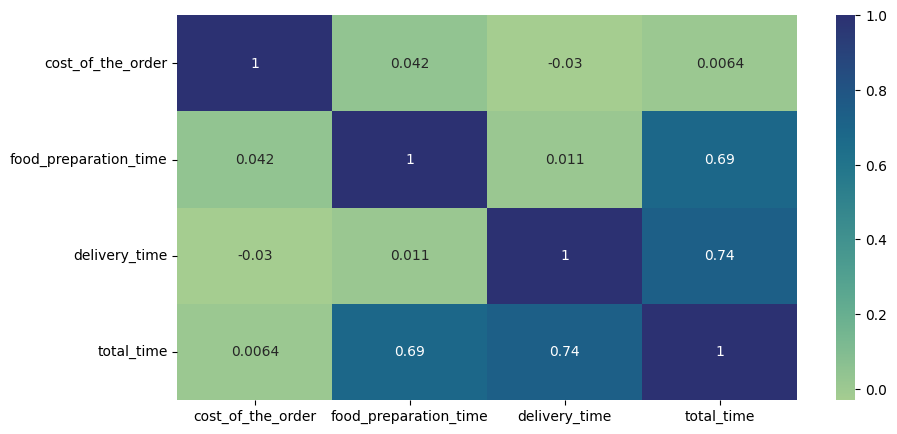

In [98]:
# Write the code here
df_less_Ids=df.drop(['order_id', 'customer_id'], axis=1)
df_numeric = df_less_Ids.select_dtypes(include='number')

plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(),annot=True,cmap='crest')
plt.show()

#### Observations:
cost of the order is negatively related to delivery time, with very less correlation value, 0.03
cost of the order is positively related to food preparation time, with very less correlation value, 0.042
delivery time and food preparation time are positively related, with very less correlation value, 0.011.


<Figure size 1000x500 with 0 Axes>

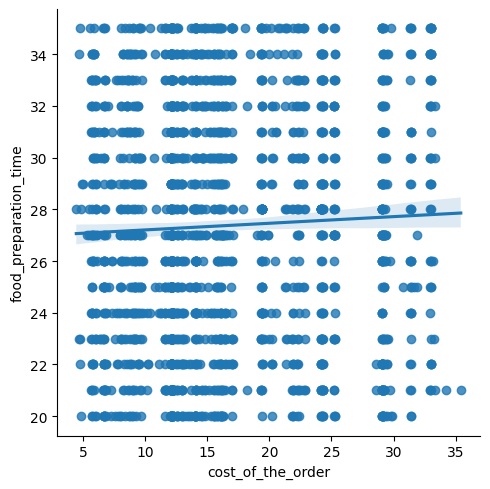

In [99]:
plt.figure(figsize=(10,5))
sns.lmplot(data=df,x='cost_of_the_order',y='food_preparation_time')
plt.show()

## Observations:
The regression line is almost flat, indicates no linear relationship between food preparation time and cost of the order

<Figure size 1000x500 with 0 Axes>

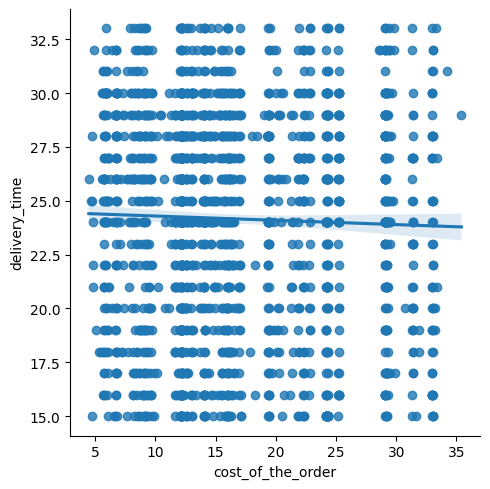

In [100]:
plt.figure(figsize=(10,5))
sns.lmplot(data=df,x='cost_of_the_order',y='delivery_time')
plt.show()

The regression line is almost flat, indicates no relation between delivery time and cost of the order

## Cost of the order

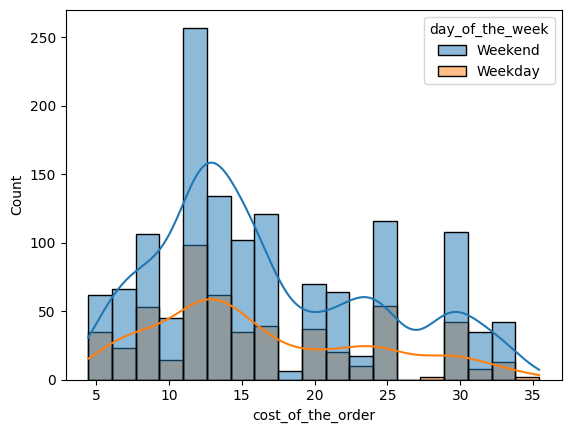

In [101]:
sns.histplot(x='cost_of_the_order',
            hue='day_of_the_week',
            data=df, kde=True)
plt.show()

## Observations:

The cost of the order is multimodal, there are highest peaks for cost of the orders in the range 12-15 dollars for weekend and weekday. There are other small peaks around 23 dollars and around 29 dollars for weekends. The distribution is positively skewed.

## Cost of the order vs day of the week

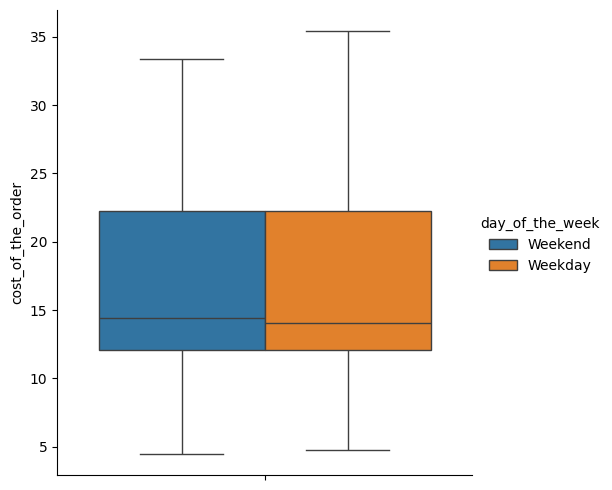

In [102]:
sns.catplot(y='cost_of_the_order',
            hue='day_of_the_week',
            data=df,kind='box')
plt.show()

## Observations:
The median of cost of the order is 14.4 dollars on weekend and 14 dollars on weekday, not a big difference.

## Order count of top cuisine vs struggling 5 cuisines

In [103]:
def print_order_cnts(cuisine):
    print(cuisine+" weekday order count-",len(df[(df['cuisine_type'] == cuisine) & (df['day_of_the_week'] =='Weekday')]))
    print(cuisine+" Weekend order count-",len(df[(df['cuisine_type'] == cuisine) & (df['day_of_the_week'] =='Weekend')]))

In [104]:
struggling_cuisines=['French', 'Southern', 'Korean', 'Spanish', 'Vietnamese']
for cu in struggling_cuisines:
    print_order_cnts(cu)

French weekday order count- 5
French Weekend order count- 13
Southern weekday order count- 6
Southern Weekend order count- 11
Korean weekday order count- 2
Korean Weekend order count- 11
Spanish weekday order count- 1
Spanish Weekend order count- 11
Vietnamese weekday order count- 3
Vietnamese Weekend order count- 4


In [105]:
print_order_cnts('American')

American weekday order count- 169
American Weekend order count- 415


## Observations:
There are very few orders in the struggling cuisines compared to top cuisine, American. Spanish has 1 and Korean has 2 for weekday

## Cuisine type vs cost of the order



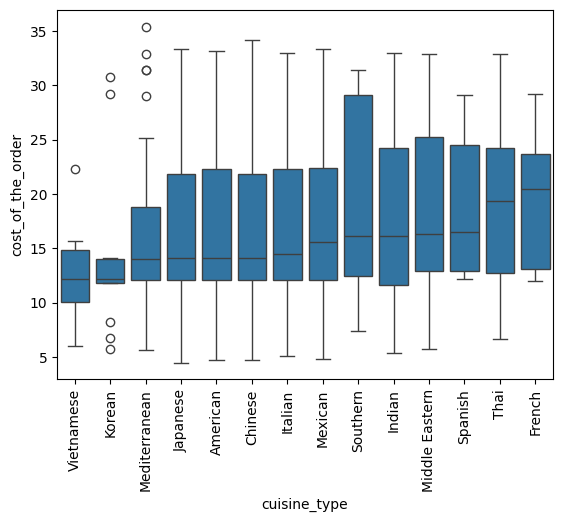

In [106]:
order = df.groupby("cuisine_type")["cost_of_the_order"].median().sort_values().index
sns.boxplot(df, x="cuisine_type", y="cost_of_the_order",order=order)

plt.xticks(rotation=90)
plt.show()

## Observations:
In Thai and French cuisines, median price is 20 dollars, compared to other cuisines around 16.5 dollars. In Southern cuisine, 75% of the orders cost less than 29 dollars, followed by Middle Eastern cost less than 25 dollars, followed by Spanish cost less than 24.7 dollars. French, Southern, Spanish, have more median price than American, Japanese, Italian, Korean, Vietnamese.

## Cuisine type, day of the week vs cost of the order

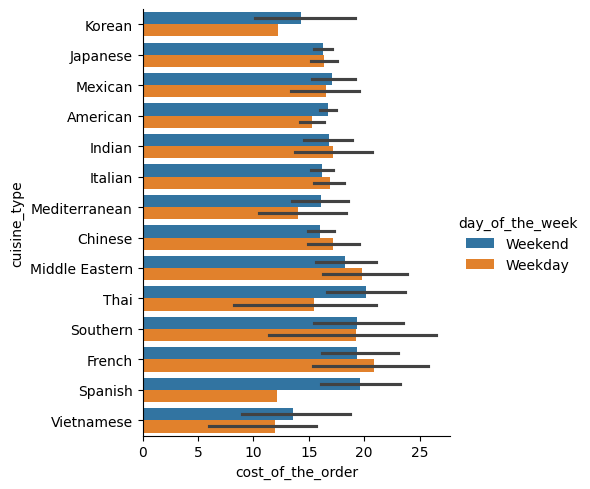

In [107]:
sns.catplot(x='cost_of_the_order',
            y='cuisine_type',
            hue='day_of_the_week',
            data=df,
            kind="bar", sharex=False)
plt.show()

## Observations:
French, Southern, have more average price than American, Japanese, Italian, Korean and Vietnamese. Spanish has less average price on weekdays compared to American, Japanese, Italian and more average price on weekends compared to American, Japanese, Italian

## Average cost of the order, average food preparation time

In [108]:
print("Average cost of the order-",df['cost_of_the_order'].mean())

Average cost of the order- 16.498851422550054


In [109]:
print("Average food preparation time-",df['food_preparation_time'].mean())

Average food preparation time- 27.371970495258168


## Cuisine type, day of the week vs order count

In [110]:
df_orders_cuisines=df.groupby(['cuisine_type','day_of_the_week'])["order_id"].count().sort_values().to_frame()

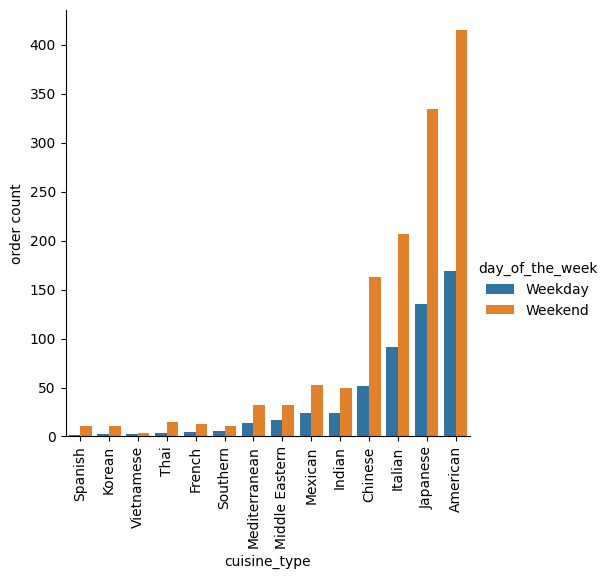

In [111]:
g=sns.catplot(df_orders_cuisines,x="cuisine_type",y='order_id',hue="day_of_the_week",kind='bar')
g.set_axis_labels("cuisine_type","order count")
plt.xticks(rotation=90)
plt.show()

## Observations
For all cuisines, there are more orders on weekend vs weekday

## Food preparation time

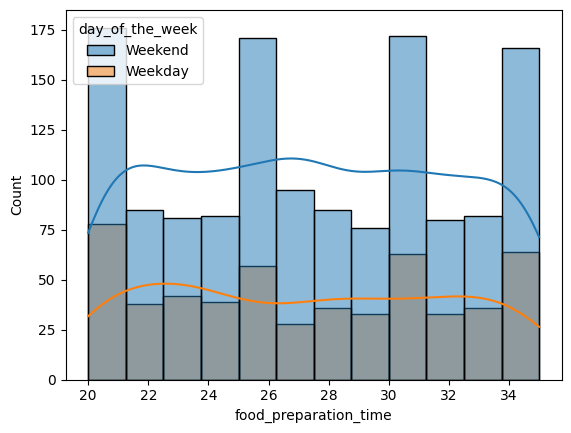

In [112]:
sns.histplot(df,x='food_preparation_time',hue='day_of_the_week',kde=True)
plt.show()

#### Observations:
The food preparation time has bimodal distribution from the KDE plot for weekend with peaks centered around 21-22min and 26-27min and for weekday, it is around 21-23min. There are more orders with these food preparation times. The spread for weekend is more concentrated around higher food preparation times than weekday

## Food preparation time vs cuisine type

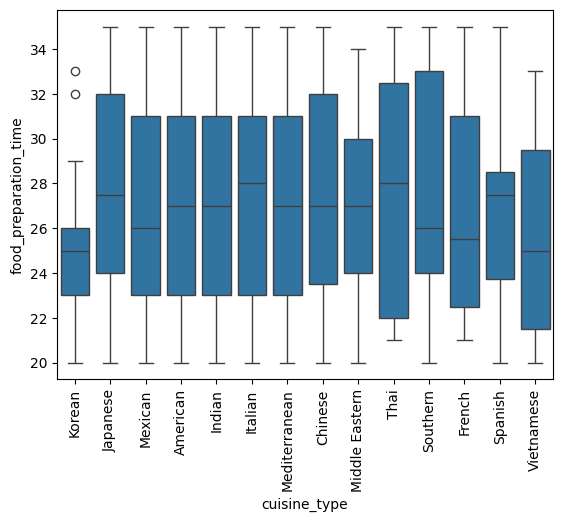

In [113]:
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.show()

## Observations:
50% of orders are complete in around 27min for American, Indian, Italian, Chinese, Middle Eastern.
75% of orders take less than around 31min for Mexican, American, Indian, Italian, Mediterranean, Chinese

## Food preparation time, day of the week vs cuisine type

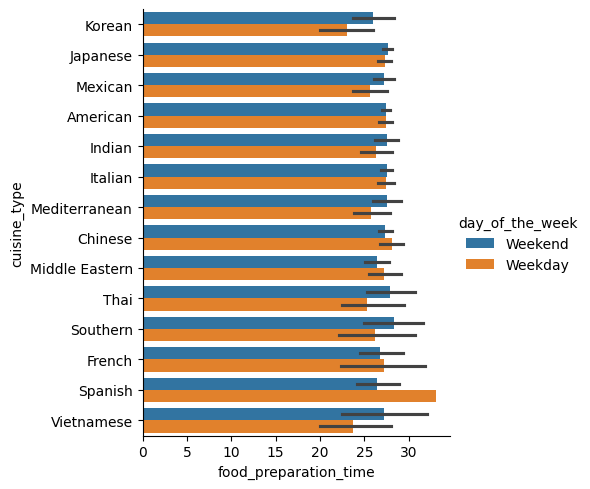

In [114]:
sns.catplot(x='food_preparation_time',
            y='cuisine_type',
            hue='day_of_the_week',
            data=df,
            kind="bar", sharex=False)
plt.show()

#### Observations:
The average food preparation time is around 23-27min for all cuisines on weekend and weekday except for Spanish on weekday which is above 30min. From observations prior, Spanish has one order for weekday.

## Food preparation time, day of the week vs cuisine type

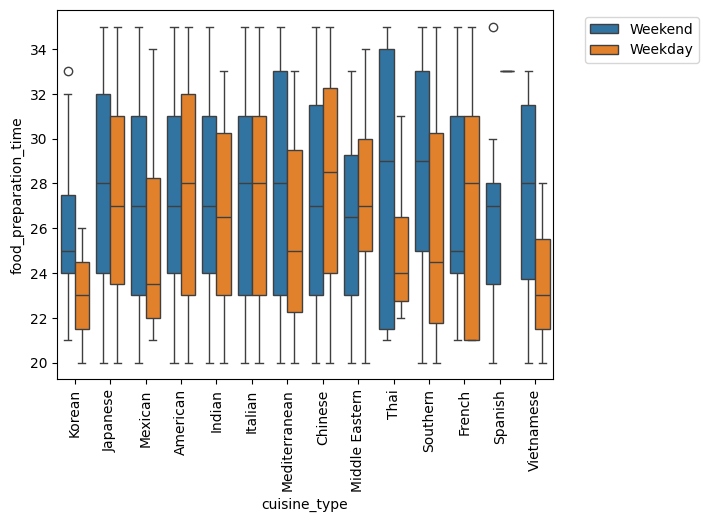

In [115]:
sns.boxplot(x='cuisine_type', y='food_preparation_time', hue='day_of_the_week', data=df)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [116]:
def fpt(cs):
    print(cs,'\n________________')
    we_fps=df[(df['cuisine_type'] == cs) & (df['day_of_the_week'] == 'Weekend')]['food_preparation_time'].median()
    wd_fps=df[(df['cuisine_type'] == cs) & (df['day_of_the_week'] == 'Weekday')]['food_preparation_time'].median()

    if(we_fps>wd_fps):
        d=wd_fps
    else:
        d=we_fps
    print((abs(we_fps-wd_fps)/d)*100)
    print("\n")

In [117]:
fpt('Southern'),fpt('French'),fpt('Vietnamese'),fpt('Thai'),fpt('Mediterranean'),fpt('Mexican')

Southern 
________________
18.367346938775512


French 
________________
12.0


Vietnamese 
________________
21.73913043478261


Thai 
________________
20.833333333333336


Mediterranean 
________________
12.0


Mexican 
________________
14.893617021276595


(None, None, None, None, None, None)

#### Observations:
The median food preparation time is approximately in the range 20 and 30 min.

Significant % change of food preparation time from weekday to weekday as follows:

| cuisine    | % change |
|:-----------|:--------:|
| Southern   |  18.36%  |
| Vietnamese |  21.74%  |
| Thai       |  20.83%  |

Italian has the same median food preparation time on both weekdays and weekends. American, Japanese, Indian, Middle Eastern also have less difference in the median food preparation time(within 1 minute range) on  weekdays and weekends.

## Delivery time

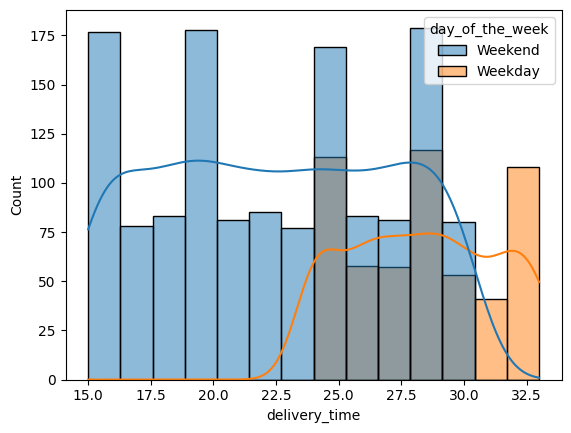

In [118]:
sns.histplot(df, x='delivery_time', hue='day_of_the_week', kde=True)
plt.show()

#### Observations:
The delivery time has bimodal distribution from the KDE plot with peaks centered around 24-25min and 27-28min on weekend and around 23-25min and 31-32.5min on weekday.There are more orders with these delivery times.There's a difference in the spread of distribution for weekday and weekend. Weekday being more dense than weekend with higher delivery times from around 22-33min

## Delivery time and day of the week

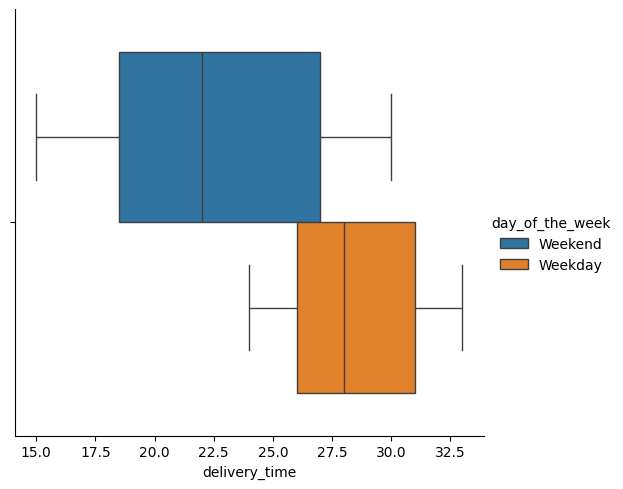

In [119]:
# Dispersion of price in every region
sns.catplot(x='delivery_time',
            hue='day_of_the_week',
            data=df,
            kind="box")
plt.show()

## Observations:

Median delivery time is around 28 minutes on weekday and 22 minutes on a weekend


## Delivery time, day of the week vs cuisine type

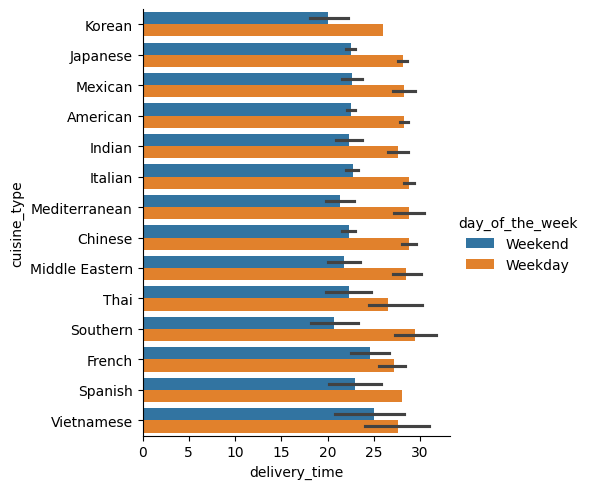

In [120]:
sns.catplot(x='delivery_time',
            y='cuisine_type',
            hue='day_of_the_week',
            data=df,
            kind="bar", sharex=False)
plt.show()

## Observations:
There is a pattern in the weekends vs weekends in delivery times for cuisines. More detailed below.

## Delivery time, weekday vs cuisine type

In [121]:
order = df[df['day_of_the_week']=='Weekday'].groupby(["cuisine_type"])["delivery_time"].mean().sort_values().index.tolist()
df_weekday = df[df['day_of_the_week']=='Weekday']

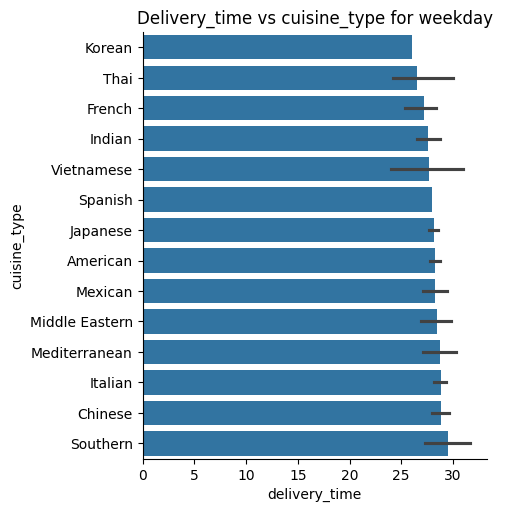

In [122]:
sns.catplot(x='delivery_time',
            y='cuisine_type',
            data=df_weekday,
            kind="bar", sharex=False,order=order).set(title="Delivery_time vs cuisine_type for weekday")
plt.show()

## Observations:
The average delivery time of all cuisines on weekday is below 30 min. Korean, French, Vietnamese, Spanish have lower average delivery time than American.American is around 28min. Spanish might not be considered having one record for Weekday.Southern has the highest average delivery time close to 29.5min.

## Delivery time, weekend vs cuisine type

In [123]:
order_weekend = df[df['day_of_the_week']=='Weekend'].groupby(["cuisine_type"])["delivery_time"].mean().sort_values().index.tolist()
df_weekend = df[df['day_of_the_week']=='Weekend']

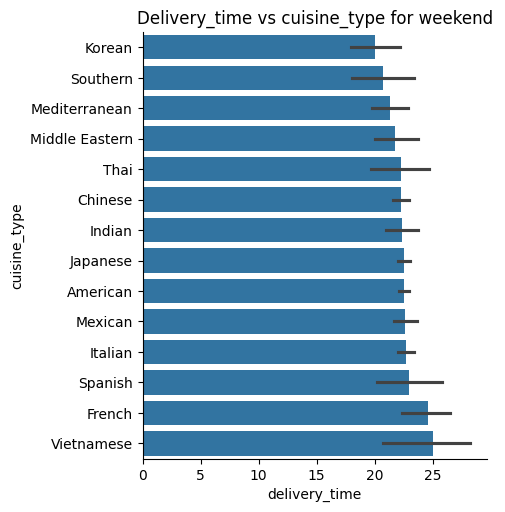

In [124]:
sns.catplot(x='delivery_time',
            y='cuisine_type',
            data=df_weekend,
            kind="bar", sharex=False,order=order_weekend).set(title="Delivery_time vs cuisine_type for weekend")
plt.show()

## Observations:
The average delivery time of all cuisines on weekend is below 25 min. French, Vietnamese, Spanish have higher average delivery time than American.For American, it is around 22min. Spanish might not be considered having one record for Weekday.Korean and Southern have lower delivery times than American. Vietnamese has the highest average delivery time close to 25min.

## Ratings

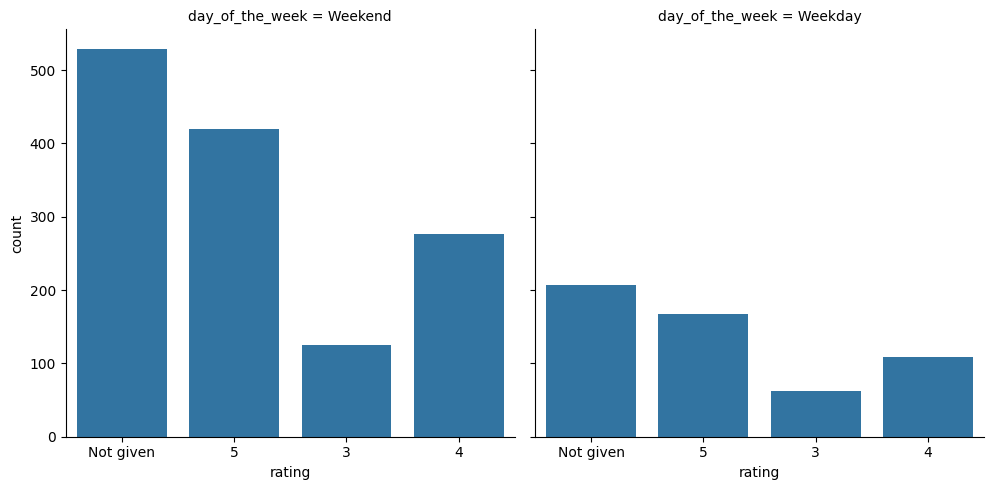

In [125]:
sns.catplot(x='rating',
            col='day_of_the_week',
            data=df,
            col_wrap=2,
            kind="count")
plt.show()

## Observations:

There are more ratings given on weekend than weekday(around more than double). Of the rated, the orders with 5 ratings are highest, followed by rating 4 and then rating 3

## Cost of the order, day of the week vs rating

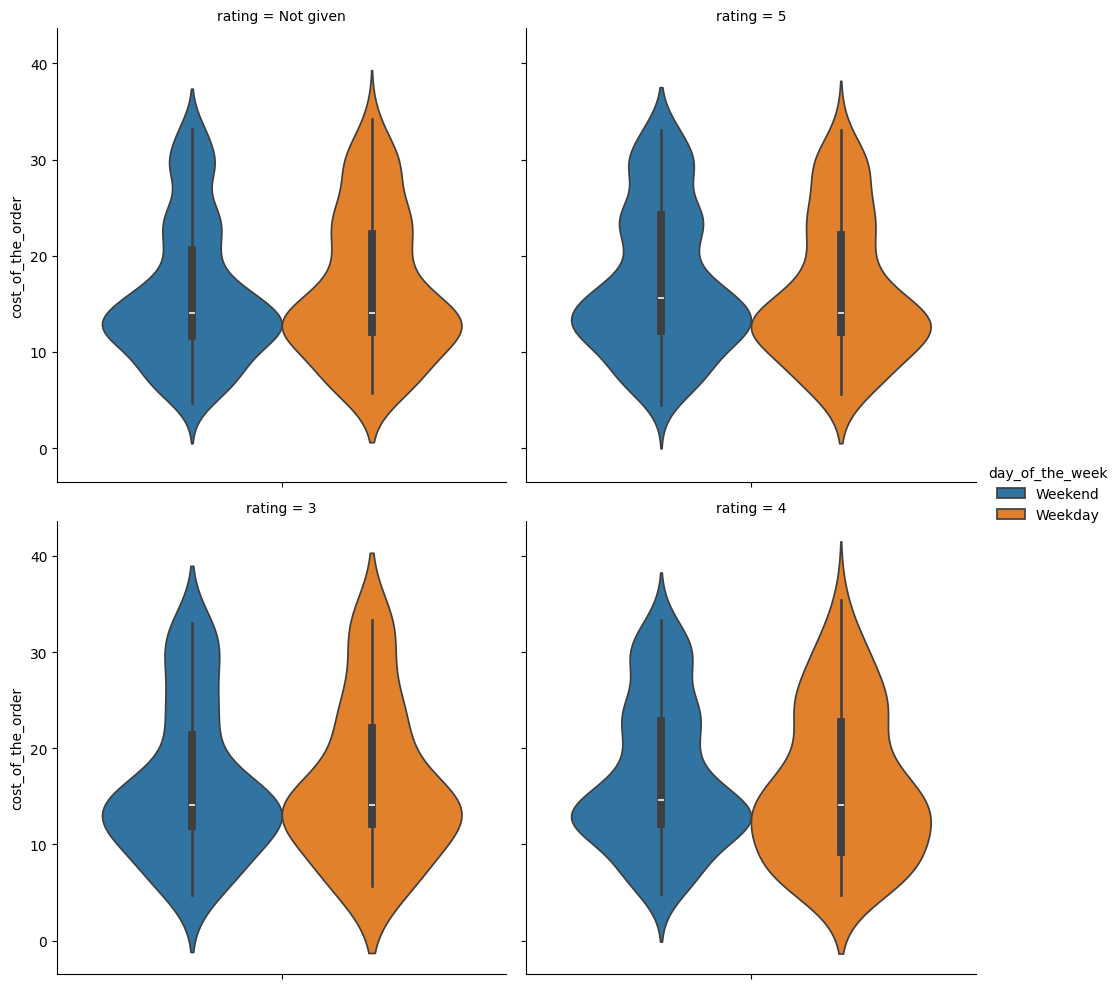

In [126]:
sns.catplot(y='cost_of_the_order',
            col='rating',
            data=df,
            hue="day_of_the_week",
            col_wrap=2,
            kind="violin")
plt.show()

## Observations:
The median cost for 5, 4 and 3 ratings is in the range 14-15 dollars. There's not much of difference in the median cost of the orders for the ratings for weekends and weekdays. There are more number of ratings for cost of the order between 10-15 dollars. As the order value increases, there more ratings of 4 and 5 compared to 3


## Cuisine type, day of week, rating

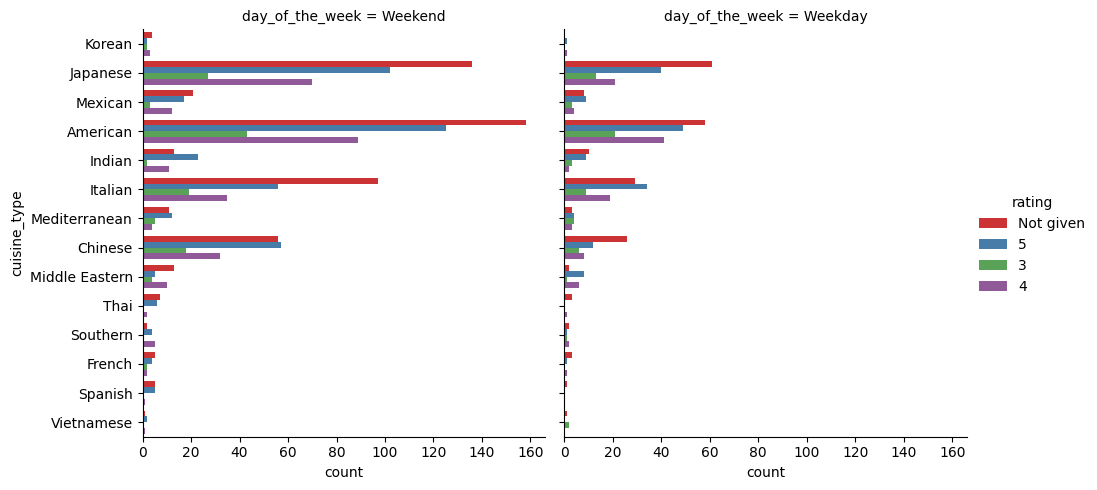

In [127]:
sns.catplot(y="cuisine_type", hue="rating", col='day_of_the_week',data=df,kind='count',palette="Set1")
plt.show()

## Observations:
There are more ratings given on a weekend compared to a weekday.
More ratings are given to the cuisines, American, Japanese, Chinese, Italian than other cuisines

## Delivery time vs rating for Weekend

In [128]:
df_weekend = df[df['day_of_the_week']=='Weekend']

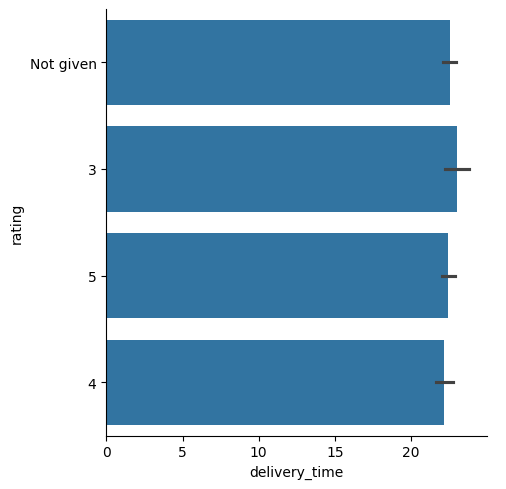

In [129]:
sns.catplot(x='delivery_time',
            y='rating',
            data=df_weekend,
            kind="bar", sharex=False)
plt.show()

## Observations:
On weekends, orders with rating 3 have the highest average delivery time compared to orders 4 and 5.

## Delivery time vs rating for Weekday

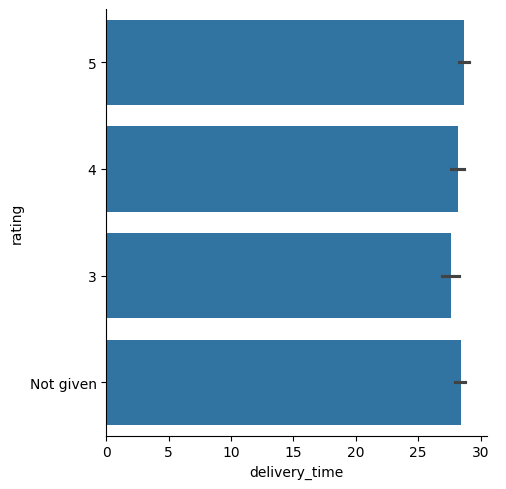

In [130]:
sns.catplot(x='delivery_time',
            y='rating',
            data=df_weekday,
            kind="bar", sharex=False)
plt.show()

## Observations:
On weekdays, orders with rating 5 have the highest average delivery time compared to orders 4 and 3. The ratings on weekdays doesn't depend on delivery time alone.

## Total time

## Rating vs Total time

<Figure size 2500x1500 with 0 Axes>

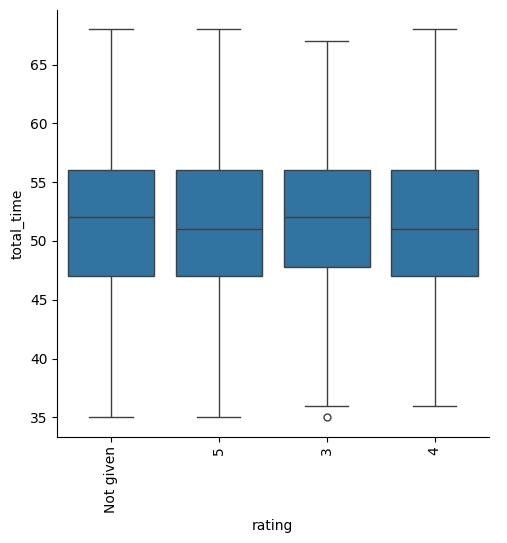

In [131]:
plt.figure(figsize=(25,15))

sns.catplot(x='rating',
            y='total_time',
            data=df,
            kind="box")

plt.xticks(rotation=90)
plt.show()

## Observation:

The median total time is around 51 min, for orders with ratings 4 and 5, and is 52 min for those with rating 3

## Total time vs cuisine type

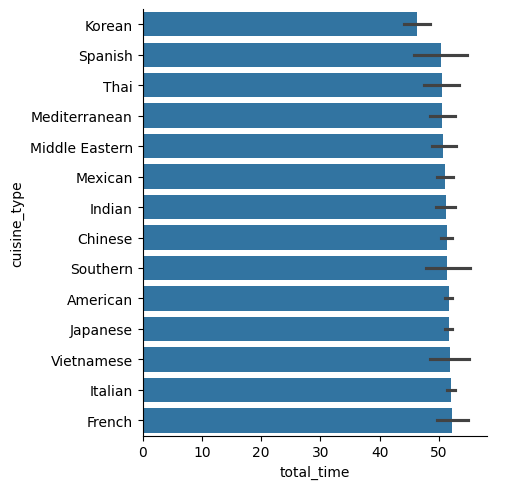

In [132]:
order = df.groupby(["cuisine_type"])["total_time"].mean().sort_values().index.tolist()

sns.catplot(x='total_time',
            y='cuisine_type',
            data=df,
            kind="bar", sharex=False,order=order)
plt.show()

## Observations:
Average total time for all the cuisines is around 50-52 min.Only Korean has much less around 46 min.
Average total time of Spanish, Korean is less than the topmost American. Southern, Vietnamese is around the same time as American. French is greater than American

### Conclusions:
*  Considering number of orders, the top cuisine is American and struggling 5 cuisines are French, Southern, Korean, Spanish, Vietnamese. Spanish has one order and Korean has two orders for weekday, they might not be good candidates to decisively compare them with other cuisines for weekdays.
* American cuisine that has 41 restaurants while each of struggling 5 cuisines have less than 6
* For all the cuisines, the number of orders is more on weekends than weekdays
* There are more ratings given on a weekend compared to a weekday.
* Of the rated, the orders with 5 ratings are highest, followed by rating 4 and then rating 3
* More ratings are given to the cuisines, American, Japanese, Chinese, Italian than other cuisines
* Average delivery time on weekday is 26.12% increase than weekend(Average delivery time on weekday is 28.34 minutes and on weekend is 22.47 minutes)
* The average food preparation time is 27.37min
* The average cost of the order is 16.49 dollars
* On weekends, orders with rating 3 have the highest average delivery time compared to orders 4 and 5.
* On weekdays, orders with rating 5 has highest average delivery time compared to orders 4 and 3.
* Vietnamese has the highest average delivery time close to 25min on weekends
* Southern has the highest average delivery time close to 29.5min on weekdays
* Significant % change of median food preparation time from weekday to weekdend as follows:

| cuisine    | % change |
|:-----------|:--------:|
| Southern   |  18.36%  |
| Vietnamese |  21.74%  |
| Thai       |  20.83%  |

* Italian has the same median food preparation time on both weekdays and weekends. American, Japanese also have less difference in the median food preparation time(within 1 minute range) on  weekdays and weekends.
* Korean has low delivery times, food preparation times, cost of the order yet has low orders. Possible reasons could be the demography nearby.

### Recommendations:

*  From the above conclusions, more resources could be employed and infrastructure could be advanced to ensure that delivery times be improved for weekdays and for weekends could be improved further.
* Incentivizing customers to provide ratings, could lead to better data insights
* Collaborating with the restaurants of struggling cuisines, the food preparation  could be decreased and cost of the menu items could be lowered.
* Promotional offers to struggling restaurants could be given providing the incentive to perform well
* Well performing restaurants could be added to the struggling cuisines to improve the revenue
